In [1]:
import os
import glob
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataset_path = 'Faceshape_dataset'
# The dataset folder is inside a subdirectory called 'dataset'
base_dir = os.path.join(dataset_path)
print('using dataset folder: ', base_dir)
#list the subdirectories in base_dir
subdirs = os.listdir(base_dir)
print('subdirectories in base_dir: ', subdirs)

using dataset folder:  Faceshape_dataset
subdirectories in base_dir:  ['test', 'train']


In [3]:
#prepare a list to collect file paths and labels
data = []

#iterate over the subdirectories
for split in subdirs:
    split_dir = os.path.join(base_dir, split)
    if not os.path.isdir(split_dir):
        print(f'warning: {split_dir} is not a directory, skipping.')
        continue
    #list class folders within each split directory
    class_folders = [os.path.join(split_dir, folder)
                     for folder in os.listdir(split_dir)
                     if os.path.isdir(os.path.join(split_dir, folder))]
    print(f'found class folders in "{split}":', [os.path.basename(cf) for cf in class_folders])
    
    #iterate over each class folder
    for class_folder in class_folders:
        label = os.path.basename(class_folder) #folder name as label
        #get all images filepath
        img_files = glob.glob(os.path.join(class_folder,'*.*'))
        print(f'found {len(img_files)} files in "{label}" folder under "{split}".')
        for img_path in img_files:
            data.append({'filepath': img_path, 'label': label, 'orginal_split': split})

#create a dataframe from the collected data
df = pd.DataFrame(data)
#check if df contains the label
if 'label' in df.columns and not df.empty:
    print('Total samples in the dataset: ', len(df))
    print('class distribution:')
    print(df['label'].value_counts())
else:
    raise KeyError('the label column is missing from df.')

#split dataset into train 70% test 10% validation 20%
#first split the test set 10%
train_val_df, test_df = train_test_split(
    df,
    test_size=0.10,
    stratify=df['label'],
    random_state=42)

#from the remaining 90% allocate 20% for validation
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.2222, #~20% of overall data
    stratify=train_val_df['label'],
    random_state=42)

#show the number of samples for each split
print('\ntrain samples: ', len(train_df))
print('\nvalidation samples: ', len(val_df))
print('\ntest samples: ', len(test_df))

#save the splits to csv for processing
train_df.to_csv('train_data.csv', index=False)
val_df.to_csv('val_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

found class folders in "test": ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
found 200 files in "Heart" folder under "test".
found 200 files in "Oblong" folder under "test".
found 199 files in "Oval" folder under "test".
found 199 files in "Round" folder under "test".
found 200 files in "Square" folder under "test".
found class folders in "train": ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
found 798 files in "Heart" folder under "train".
found 798 files in "Oblong" folder under "train".
found 797 files in "Oval" folder under "train".
found 789 files in "Round" folder under "train".
found 799 files in "Square" folder under "train".
Total samples in the dataset:  4979
class distribution:
label
Square    999
Heart     998
Oblong    998
Oval      996
Round     988
Name: count, dtype: int64

train samples:  3485

validation samples:  996

test samples:  498


In [4]:
train_df

,filepath,label,orginal_split
3461,Faceshape_dataset\train\Round\Round(161).jpg,Round,train
3700,Faceshape_dataset\train\Round\Round(377).jpg,Round,train
4368,Faceshape_dataset\train\Square\Square(268).jpg,Square,train
10,Faceshape_dataset\test\Heart\Heart(107).jpg,Heart,test
2931,Faceshape_dataset\train\Oval\Oval(401).jpg,Oval,train
...,...,...,...
4649,Faceshape_dataset\train\Square\Square(520).jpg,Square,train
4000,Faceshape_dataset\train\Round\Round(647).jpg,Round,train
3260,Faceshape_dataset\train\Oval\Oval(699).jpg,Oval,train
3481,Faceshape_dataset\train\Round\Round(18).jpg,Round,train


In [5]:
val_df

,filepath,label,orginal_split
589,Faceshape_dataset\test\Oval\Oval(90).jpg,Oval,test
1607,Faceshape_dataset\train\Heart\Heart(647).jpg,Heart,train
1452,Faceshape_dataset\train\Heart\Heart(507).jpg,Heart,train
2384,Faceshape_dataset\train\Oblong\Oblong(628).jpg,Oblong,train
854,Faceshape_dataset\test\Square\Square(149).jpg,Square,test
...,...,...,...
1090,Faceshape_dataset\train\Heart\Heart(181).jpg,Heart,train
2781,Faceshape_dataset\train\Oval\Oval(267).jpg,Oval,train
957,Faceshape_dataset\test\Square\Square(62).jpg,Square,test
3274,Faceshape_dataset\train\Oval\Oval(710).jpg,Oval,train


In [6]:
test_df

,filepath,label,orginal_split
847,Faceshape_dataset\test\Square\Square(142).jpg,Square,test
3151,Faceshape_dataset\train\Oval\Oval(60).jpg,Oval,train
3346,Faceshape_dataset\train\Oval\Oval(776).jpg,Oval,train
1353,Faceshape_dataset\train\Heart\Heart(418).jpg,Heart,train
3861,Faceshape_dataset\train\Round\Round(521).jpg,Round,train
...,...,...,...
2167,Faceshape_dataset\train\Oblong\Oblong(432).jpg,Oblong,train
4471,Faceshape_dataset\train\Square\Square(360).jpg,Square,train
1211,Faceshape_dataset\train\Heart\Heart(290).jpg,Heart,train
4543,Faceshape_dataset\train\Square\Square(425).jpg,Square,train


In [7]:
# libraries for analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

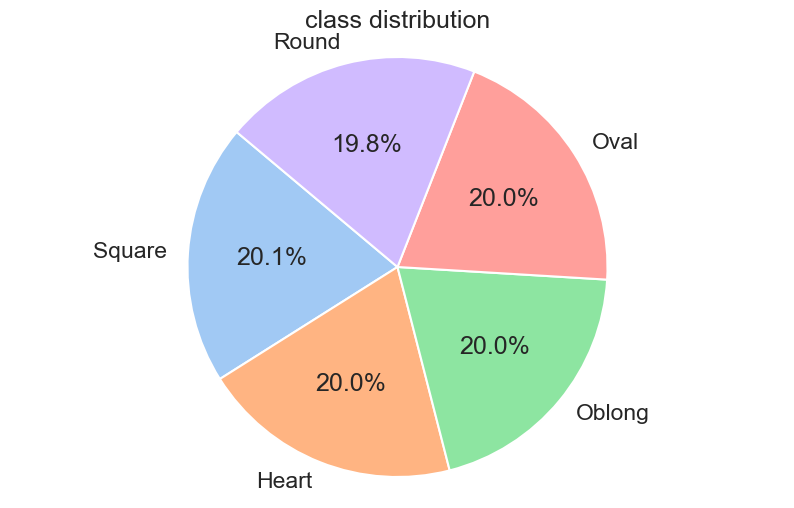

In [8]:
# plotting style
sns.set(style='whitegrid', context='talk')
plt.rcParams['figure.figsize'] = (10, 6)

#visualization overall class distribution
# create pie chart
overall_counts = df['label'].value_counts()
labels = overall_counts.index.tolist()
sizes = overall_counts.tolist()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
ax.axis('equal') # drown pie as a circle
plt.title('class distribution')
plt.show()

In [9]:
#add column indicating split for analysis later
train_df = train_df.copy()
test_df = test_df.copy()
val_df = val_df.copy()
train_df['split'] = 'Train'
test_df['split'] = 'Test'
val_df['split'] = 'Validation'

#combined splits into one df for visualization
combined_df = pd.concat([train_df, val_df, test_df], axis=0)
print('\nsamples per split: ')
print(combined_df['split'].value_counts())


samples per split: 
split
Train         3485
Validation     996
Test           498
Name: count, dtype: int64


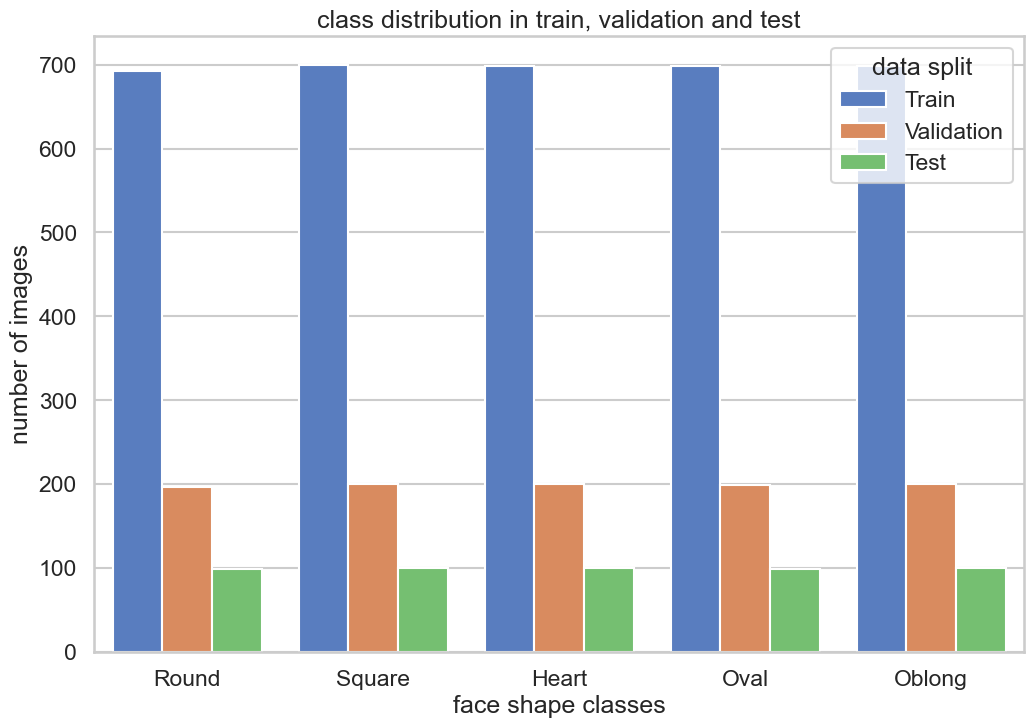

In [10]:
#visualize distribution per split
#countplot
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_df, x='label', hue='split', palette='muted')
plt.title('class distribution in train, validation and test')
plt.xlabel('face shape classes')
plt.ylabel('number of images')
plt.legend(title='data split')
plt.show()

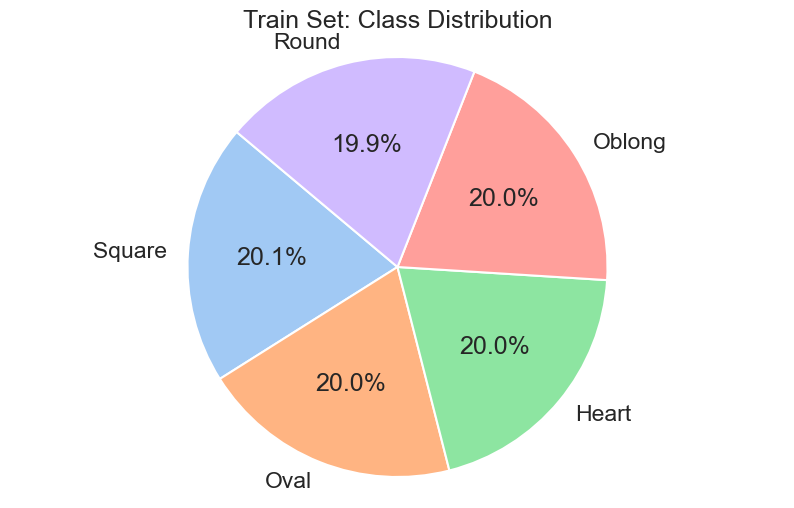

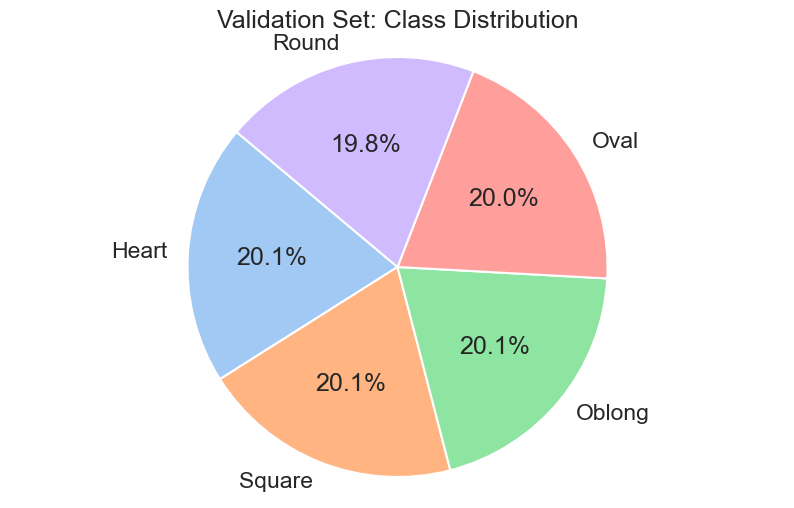

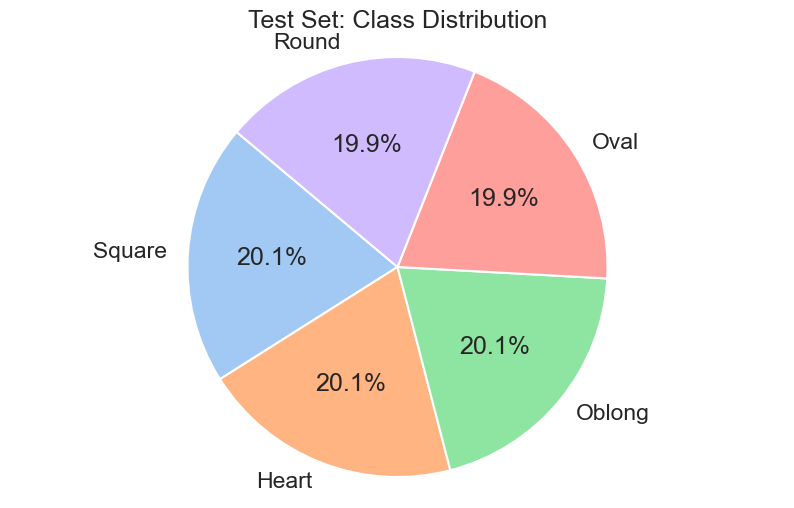

In [11]:
#chart per split for detailed view
splits = ['Train', 'Validation', 'Test']
for s in splits:
    subset = combined_df[combined_df['split'] == s]
    counts = subset['label'].value_counts()
    labels = counts.index.tolist()
    sizes = counts.tolist()
    
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    ax.axis('equal')
    plt.title(f"{s} Set: Class Distribution")
    plt.show()

In [12]:
# display sample images
def display_img(img_paths, title, cols=5):
    rows = (len(img_paths) + cols - 1) // cols
    plt.figure(figsize=(15, 3 * rows))
    for i, path in enumerate(img_paths):
        plt.subplot(rows, cols, i + 1)
        try:
            image = Image.open(path)
            plt.imshow(image)
            plt.axis('off')
        except Exception as e:
            print(f'error loading image {path}: {e}')
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
        

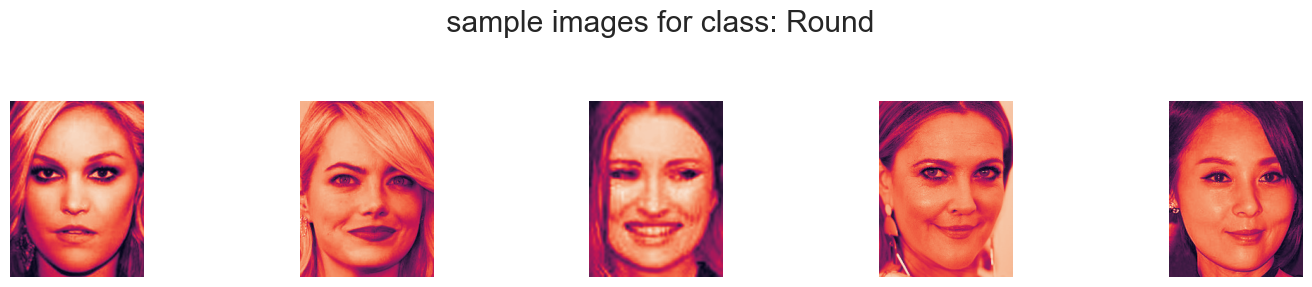

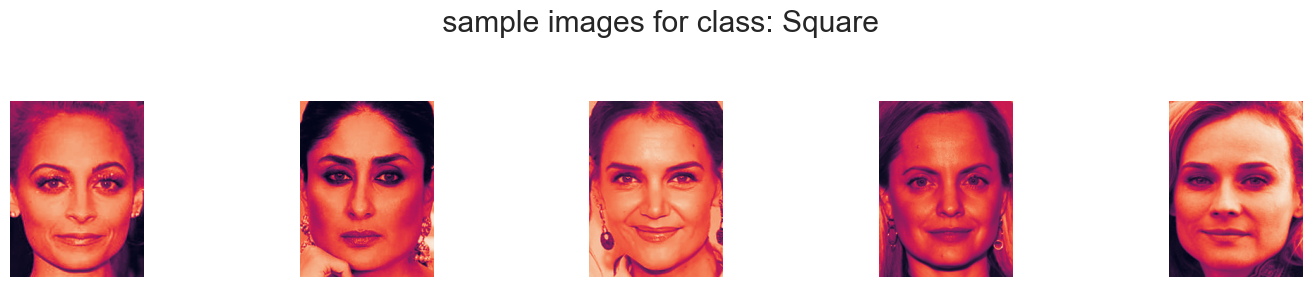

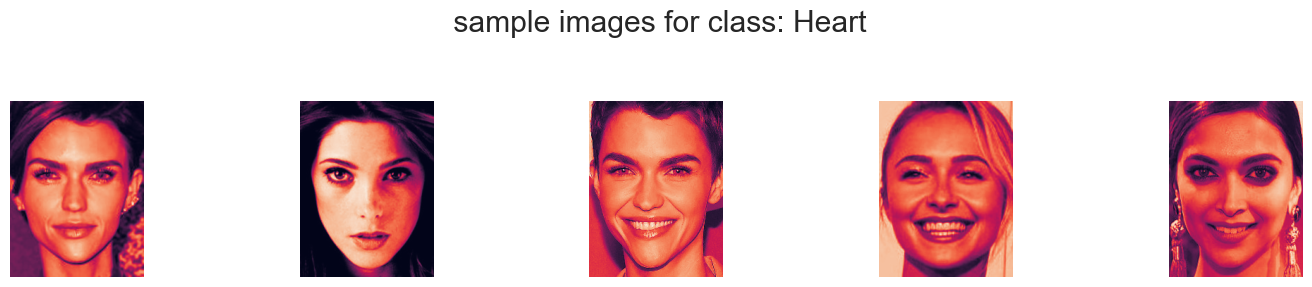

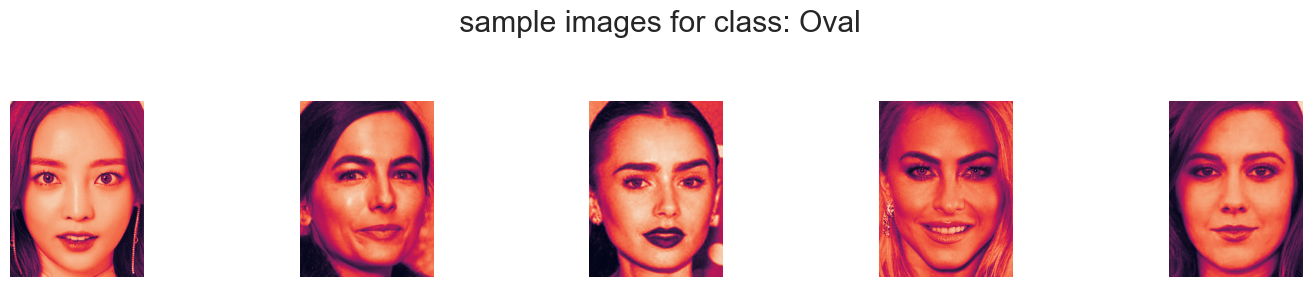

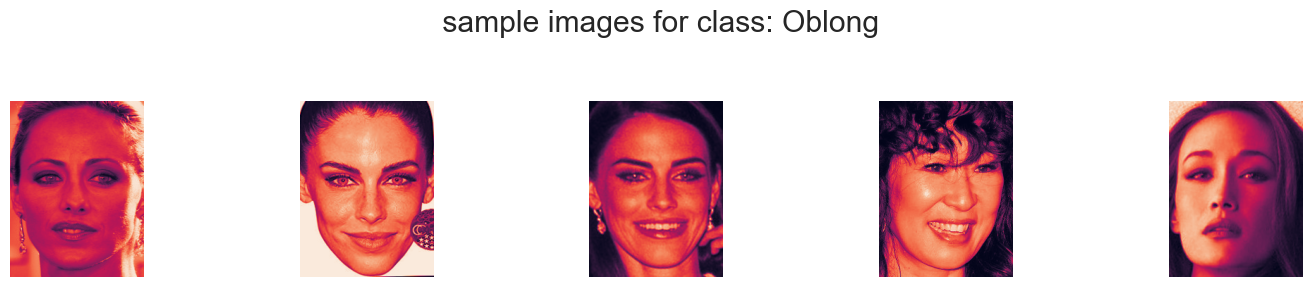

In [13]:
# from each class of train, select 5 random sample images
unique_classes = train_df['label'].unique()
for cls in unique_classes:
    sample_paths = train_df[train_df['label'] == cls]['filepath'].tolist()
    sample_paths = random.sample(sample_paths, min(5, len(sample_paths)))
    display_img(sample_paths, title=f' sample images for class: {cls}')

transformation and augmentations

In [14]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [15]:
#configuration
IMAGE_SIZE = 224
BATCH_SIZE = 64
NUM_WORKERS = 0
CSV_PATHS = {
    "train": "train_data.csv",
    "val": "val_data.csv",
    "test": "test_data.csv"
}

#augmentation
train_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),

    transforms.RandomAffine(
        degrees=10,
        translate=(0.05, 0.05)
    ),

    transforms.ColorJitter(
        brightness=0.15,
        contrast=0.15,
        saturation=0.1,
        hue=0.02
    ),

    transforms.RandomGrayscale(p=0.05),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
    
    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

#custom dataset class
class FaceShapeDataset(Dataset):
    def __init__(self, csv_file, transform= None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        
        #encode labels to int
        self.label_to_idx = {label: idx for idx, label in enumerate(sorted(self.data['label'].unique()))}
        self.idx_to_label = {idx: label for label, idx in self.label_to_idx.items()}
        self.data['label_idx'] = self.data['label'].map(self.label_to_idx)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        image_path = self.data.iloc[idx]['filepath']
        label = self.data.iloc[idx]['label_idx']
        image = Image.open(image_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

#dataloader setup
def get_dataloaders():
    train_dataset = FaceShapeDataset(CSV_PATHS['train'], transform=train_transforms)
    val_dataset = FaceShapeDataset(CSV_PATHS['val'], transform=val_test_transforms)
    test_dataset = FaceShapeDataset(CSV_PATHS['test'], transform=val_test_transforms)
    
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

    return train_loader, val_loader, test_loader, train_dataset.idx_to_label 
        
        

In [16]:
train_loader, val_loader, test_loader, idx_to_label = get_dataloaders()
print('dataloaders ready :D')

dataloaders ready :D


In [17]:
#preview first batch
images, labels = next(iter(train_loader))
print(f'image batch shape: {images.shape}')
print(f'labels: {labels[:10]}')
print(f'decoded labels: {[idx_to_label[int(lbl)] for lbl in labels[:10]]}')

image batch shape: torch.Size([64, 3, 224, 224])
labels: tensor([2, 2, 2, 3, 2, 0, 0, 2, 0, 0])
decoded labels: ['Oval', 'Oval', 'Oval', 'Round', 'Oval', 'Heart', 'Heart', 'Oval', 'Heart', 'Heart']


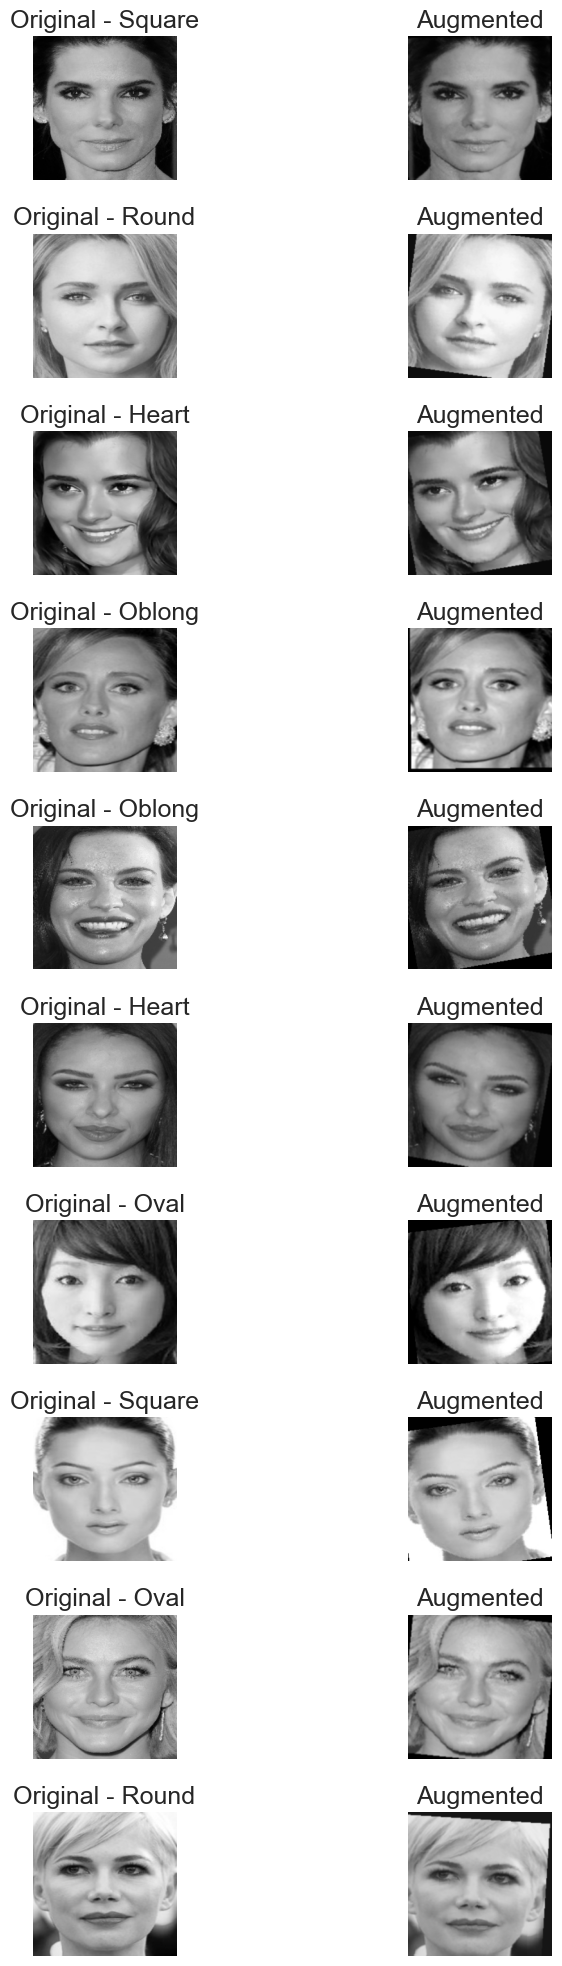

In [18]:
# Use existing config

IMAGE_SIZE = 224
CSV_PATH = "train_data.csv"

# Define transforms
original_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE))
])

# existing augmentation pipeline
augmented_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomAffine(degrees=10, translate=(0.05, 0.05)),
    transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.1, hue=0.02),
    transforms.RandomGrayscale(p=0.05),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
])

# Load and sample data
df = pd.read_csv(CSV_PATH)
sample_df = df.sample(n=10, random_state=42).reset_index(drop=True)

# Show original vs augmented
plt.figure(figsize=(10, 20))
for i, row in sample_df.iterrows():
    img_path = row['filepath']
    label = row['label']
    img = Image.open(img_path).convert("RGB")
    
    original = original_transform(img)
    augmented = augmented_transform(img)

    # Original
    plt.subplot(10, 2, 2 * i + 1)
    plt.imshow(original)
    plt.title(f"Original - {label}")
    plt.axis("off")

    # Augmented
    plt.subplot(10, 2, 2 * i + 2)
    plt.imshow(augmented)
    plt.title("Augmented")
    plt.axis("off")

plt.tight_layout()
plt.show()

creating model

In [19]:
import torch.nn as nn
import torch.nn.functional as F

class FaceShapeCNN(nn.Module):
    def __init__(self, num_classes = 5):
        super(FaceShapeCNN, self).__init__()
        
        self.features = nn.Sequential(
            # layer 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            # layer 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            # layer 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            #layer 4
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            #global average pooling
            nn.AdaptiveAvgPool2d((1, 1))
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [20]:
from torchsummary import summary

In [21]:
#instantiate the model

model = FaceShapeCNN(num_classes=5)

#move to gpu if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

#model summ
print(model)

FaceShapeCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=

In [22]:
summary(model, (3, 224, 224)) # adjusted input shape to 224 * 224 for resized images

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
       BatchNorm2d-2         [-1, 32, 224, 224]              64
              ReLU-3         [-1, 32, 224, 224]               0
            Conv2d-4         [-1, 32, 224, 224]           9,248
       BatchNorm2d-5         [-1, 32, 224, 224]              64
              ReLU-6         [-1, 32, 224, 224]               0
         MaxPool2d-7         [-1, 32, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          18,496
       BatchNorm2d-9         [-1, 64, 112, 112]             128
             ReLU-10         [-1, 64, 112, 112]               0
           Conv2d-11         [-1, 64, 112, 112]          36,928
      BatchNorm2d-12         [-1, 64, 112, 112]             128
             ReLU-13         [-1, 64, 112, 112]               0
        MaxPool2d-14           [-1, 64,

In [23]:
class EarlyStopping:
    def __init__(self, patience=10, verbose=False, delta=0, monitor= 'loss'):
        """
        :param patience:  epochs counter to wait before stopping
        :param verbose: print progress
        :param delta: min change to qualify as an improvement
        :param monitor: what to monitor (loss or acc) 
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = float('inf') if monitor == 'loss' else -float('inf')
        self.best_epoch = 0
        self.early_stop = False
        self.delta = delta
        self.monitor = monitor
        
    def __call__(self, val_score, epoch, model_weight, model_name_prefix):
        """
        :param val_score: the validation loss/acc in current epoch
        :param epoch: the curr epoch
        :param model_weight: weight of the model
        :param model_name_prefix: prefix for the model's name 
        """
        # if monitoring 'loss', we expect the value to decrease
        if self.monitor == 'loss':
            if val_score < self.best_score - self.delta:
                self.best_score = val_score
                self.best_epoch = epoch
                self.counter = 0
                self.save_best_weights(model_weight, model_name_prefix)
            else:
                self.counter += 1
                
        elif self.monitor == 'accuracy':
            if val_score > self.best_score + self.delta:
                self.best_score = val_score
                self.best_epoch = epoch
                self.counter = 0
                self.save_best_weights(model_weight, model_name_prefix)
            else:
                self.counter += 1
                
        if self.counter >= self.patience:
            self.early_stop = True
            if self.verbose:
                print(f'early stopping triggered after  {self.counter} epochs of no improvment.')
    
    
    def save_best_weights(self, model_weights, model_name_prefix):
        model_name = f'{model_name_prefix}_epoch_{self.best_epoch + 1}.pth'
        
        #clean up previous save models
        for file in os.listdir():
            if file.startswith(model_name_prefix) and file != model_name:
                os.remove(file)
                if self.verbose:
                    print(f'deleted old model file: {file}')
        
        torch.save(model_weights, model_name)
        if self.verbose:
            print(f'best model weights saved to {model_name}.')
                
            

In [24]:
# Training loop
best_val_loss = float('inf')  # Initialize best validation loss
best_model_weights = None

def train_and_validate(model, train_loader, valid_loader, optimizer, scheduler, criterion, model_name_prefix, epochs=25, device=None, early_stopping=None):

    # Store losses and accuracies
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []
    auc_scores = []

    for epoch in range(epochs):
        print(f'Epoch {epoch + 1}/{epochs}')
        print('-' * 50)

        # Training 
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            # Ensure labels are Long for CrossEntropyLoss
            labels = labels.long()  # Cast labels to Long

            # Mixed precision forward pass
            with torch.amp.autocast('cuda'):

                raw_outputs = model(inputs)  # Get raw logits (not passed through softmax)
                loss = criterion(raw_outputs, labels)  # Compute loss

            # Backward pass with mixed precision
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item() * inputs.size(0)

            # Compute predictions (Get class with highest logit)
            with torch.no_grad():
                _, preds = torch.max(raw_outputs, 1)  # Preds are class indices
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Store training loss and accuracy
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        # Validation phase
        model.eval()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Ensure labels are Long for CrossEntropyLoss
                labels = labels.long()  # Cast labels to Long

                with torch.amp.autocast('cuda'):
                    raw_outputs = model(inputs)  # Get raw logits
                    loss = criterion(raw_outputs, labels)  # Compute loss

                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(raw_outputs, 1)  # Preds are class indices
                correct_preds += torch.sum(preds == labels.data)
                total_preds += labels.size(0)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        epoch_loss = running_loss / len(valid_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Validation Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Store validation loss and accuracy
        valid_losses.append(epoch_loss)
        valid_accuracies.append(epoch_acc.item())


        # Step the scheduler based on validation loss
        scheduler.step(epoch_loss)

        # ✅ Early stopping check: save model based on validation loss
        if early_stopping is not None:
            early_stopping(epoch_loss, epoch, model.state_dict(), model_name_prefix="model")
            if early_stopping.early_stop:
                print(f"🚨 Early stopping triggered at epoch {epoch+1}.")
                break

        # ✅ Display confusion matrix & classification report every 5 epochs
        if epoch % 5 == 0 or early_stopping.early_stop:
            cm = confusion_matrix(all_labels, all_preds)
            plot_confusion_matrix(cm, classes=[i for i in range(len(set(all_labels)))])
            print("Classification Report:")
            print(classification_report(all_labels, all_preds))

    # ✅ Load the best model weights from early stopping
    print("Loading best model weights...")
    model.load_state_dict(torch.load("model_epoch_{}.pth".format(early_stopping.best_epoch + 1)))

    # ✅ Plot training metrics
    plot_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies)


    return model

#helper func to plot confusion matrix
def plot_confusion_matrix(cm, classes, title= 'confusion matrix'):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(title)
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    plt.tight_layout()
    plt.show()
    
#helper func to plot loss,acc,auc scores
def plot_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies):
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(16, 8))
    
    #plot training and valid loss
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, label='training loss', color='blue')
    plt.plot(epochs, valid_losses, label='validation loss', color='red')
    plt.title('loss per epoch')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    
    #plot train and valid acc
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_accuracies, label='training accuracy', color='blue')
    plt.plot(epochs, valid_accuracies, label='validation accuracy', color='red')
    plt.title('accuracy per epoch')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

def test_model(model, test_loader, criterion, device, num_classes=5):
    """
    Evaluates the model on the test set, computes loss and accuracy,
    and displays the confusion matrix and classification report.

    Args:
        model: The trained PyTorch model.
        test_loader: DataLoader for the test set.
        criterion: The loss function used during training (e.g., CrossEntropyLoss).
        device: The device to run inference on (e.g., torch.device('cuda') or torch.device('cpu')).
        num_classes: The number of classes in the classification task.
    """
    model.eval()  # Set model to evaluation mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Use autocast for mixed precision inference
            with torch.amp.autocast('cuda'):
                raw_outputs = model(inputs)  # Get raw logits from the model
                loss = criterion(raw_outputs, labels)  # Compute loss

            running_loss += loss.item() * inputs.size(0)

            # Get class predictions (highest probability for multi-class)
            _, preds = torch.max(raw_outputs, 1)

            # Update accuracy counters
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

            # Accumulate for metrics
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate overall test loss and accuracy
    test_loss = running_loss / len(test_loader.dataset)
    test_accuracy = correct_preds.double() / total_preds

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Compute confusion matrix and classification report
    cm = confusion_matrix(all_labels, all_preds)
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(num_classes)]))

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(num_classes)], yticklabels=[str(i) for i in range(num_classes)])
    plt.xlabel('predicted')
    plt.ylabel('true')
    plt.title('confusion matrix')
    plt.show()

In [26]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.cuda.amp import GradScaler

# Class weights (based on dataset size)
# Assuming classes like this: [200, 200, 199, 197, 200]
class_counts = torch.tensor([200, 200, 199, 197, 200], dtype=torch.float)
weights = 1.0 / class_counts
weights = weights / weights.sum()
loss_fn = nn.CrossEntropyLoss(weight=weights.to(device))

# Optimizer
optimizer = optim.AdamW(
    model.parameters(),
    lr=2e-4,              # Raised for better initial learning
    weight_decay=2e-4     # Softer regularization
)

#LR Scheduler
scheduler = ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,           # More aggressive drop
    patience=3,           # React quicker to plateaus
    threshold=0.001,
    verbose=True
)

#AMP for speed
scaler = GradScaler()

#Epochs
num_epochs = 100

print(f"✅ Model Initialized on {device}")

✅ Model Initialized on cpu


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
C:\Users\lenovo_irg\AppData\Local\Temp\ipykernel_2268\2357194808.py:30: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


In [27]:
"""# Example:
early_stopping = EarlyStopping(patience=15, verbose=True, delta=0)
model_name_prefix = "CustomCNN1"  # Or dynamically change this per model
trained_model = train_and_validate(
    model,
    train_loader,
    val_loader,
    optimizer,
    scheduler,
    loss_fn,
    epochs=100,
    device=device,
    early_stopping=early_stopping,
    model_name_prefix=model_name_prefix)"""

'# Example:\nearly_stopping = EarlyStopping(patience=15, verbose=True, delta=0)\nmodel_name_prefix = "CustomCNN1"  # Or dynamically change this per model\ntrained_model = train_and_validate(\n    model,\n    train_loader,\n    val_loader,\n    optimizer,\n    scheduler,\n    loss_fn,\n    epochs=100,\n    device=device,\n    early_stopping=early_stopping,\n    model_name_prefix=model_name_prefix)'

In [28]:
test_model(trained_model, test_loader, loss_fn, device, num_classes=5)

NameError: name 'trained_model' is not defined

In [29]:
print([idx_to_label[i] for i in range(len(idx_to_label))])  

['Heart', 'Oblong', 'Oval', 'Round', 'Square']


In [30]:
print(idx_to_label)
# Output should be something like:
# {0: 'oval', 1: 'oblong', 2: 'heart', 3: 'round', 4: 'square'}


{0: 'Heart', 1: 'Oblong', 2: 'Oval', 3: 'Round', 4: 'Square'}


In [31]:
import os
import torch
import pandas as pd
from PIL import Image
import torchvision.transforms as transforms

#  config
MODEL_PATH = 'model_epoch_67.pth'
TEST_FOLDER = 'faceshape_dataset/test'
SAVE_PATH = 'predictions.txt'
CSV_PATH = 'train_data.csv'
IMAGE_SIZE = 224
NUM_CLASSES = 5

df = pd.read_csv(CSV_PATH)
label_to_idx = {label: idx for idx, label in enumerate(sorted(df['label'].unique()))}
idx_to_label = {idx: label for label, idx in label_to_idx.items()}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

model = FaceShapeCNN(num_classes=NUM_CLASSES)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.to(device)
model.eval()

def predict_all_images(model, folder_path, save_path):
    results = []
    valid_format = (".jpg", ".jpeg", ".png", ".jfif", ".bmp", ".webp")
    image_count = 0

    for root, _, files in os.walk(folder_path):
        for filename in files:
            if filename.lower().endswith(valid_format):
                image_path = os.path.join(root, filename)
                try:
                    img = Image.open(image_path).convert("RGB")
                    img_tensor = transform(img).unsqueeze(0).to(device)
                except Exception as e:
                    print(f"skipped {filename} (error: {e})")
                    continue

                with torch.no_grad():
                    output = model(img_tensor)
                    pred_idx = torch.argmax(output, dim=1).item()
                    pred_label = idx_to_label[pred_idx]

                results.append(f"{filename} --> Predicted: {pred_label}\n")
                image_count += 1

    with open(save_path, 'w') as f:
        f.writelines(results)

    print(f"\n✅ Done! {image_count} images processed.")
    print(f"📄 Predictions saved to: {save_path}")

predict_all_images(model, TEST_FOLDER, SAVE_PATH)



✅ Done! 998 images processed.
📄 Predictions saved to: predictions.txt


In [48]:
def predict_single_image(model, image_path):
    valid_exts = (".jpg", ".jpeg", ".png", ".jfif", ".bmp", ".webp")
    
    if not image_path.lower().endswith(valid_exts):
        print("❌ invalid image file format.")
        return

    try:
        img = Image.open(image_path).convert("RGB")
        img_tensor = transform(img).unsqueeze(0).to(device)
    except Exception as e:
        print(f"❌ error loading image: {e}")
        return

    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        pred_idx = torch.argmax(output, dim=1).item()
        pred_label = idx_to_label[pred_idx]

    print(f"✅ predicted face shape: {pred_label}")

img_path = 'round5.jpg'  
predict_single_image(model, img_path)



✅ predicted face shape: Heart
